# Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df= pd.read_csv('titanic.csv')

In [3]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 4 object type columns in which Name column we will remove rest we try to encode 

CHECKING FOR DUBLICATES 

In [5]:
sum(df.duplicated())

0

# ENCODING THE DATA

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df['Sex']=le.fit_transform(df.Sex)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [8]:
print(df.Embarked.value_counts())
df['Embarked']=le.fit_transform(df.Embarked)
df.head()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [9]:
print(df.Ticket.value_counts())
df['Ticket']=le.fit_transform(df.Ticket)
df.head()

347082       7
1601         7
CA. 2343     7
347088       6
CA 2144      6
            ..
33638        1
PC 17585     1
345781       1
A/5 21174    1
113059       1
Name: Ticket, Length: 681, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,NaN,2


In [10]:
df['Survived'].corr(df['Ticket'])

-0.16454913400236726

MOSTLY HAVING DIFFERENT TICKET TYPES - LATER WILL DROP THIS COLUMNS AS IRRELEVANT

In [11]:
print(df.Cabin.value_counts())

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
E101           3
              ..
C148           1
D19            1
E12            1
C50            1
A7             1
Name: Cabin, Length: 147, dtype: int64


from just 204 data - 147 are unique values, we can't fill the data with mode values and it doen't make sense so will remove this columns too 

# checking for null value

<AxesSubplot:>

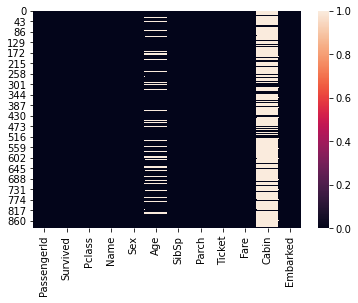

In [13]:
sns.heatmap(df.isnull())

WIll ignore the cabin column as we going to remove it                  
rest Age columns need to be filled 

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

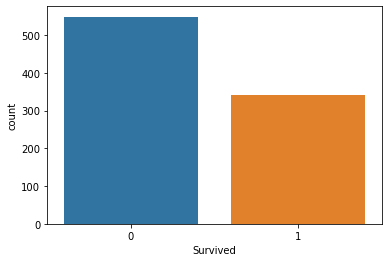

In [15]:
sns.countplot(x='Survived',data=df)

TARGET DISTRIBUTION IS APPROPRIATE 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

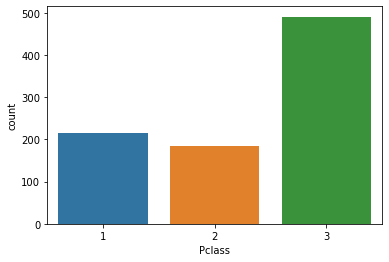

In [140]:
sns.countplot(x='Pclass',data=df)

In [16]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).T.style.background_gradient()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

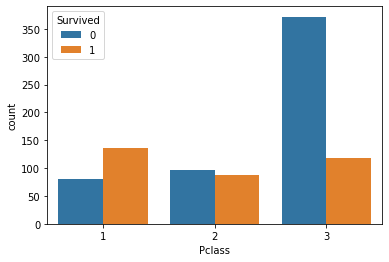

In [141]:
sns.countplot(x='Pclass',hue='Survived',data=df)

CATEGORIZING THE AGE AND FARE COLUMN 

In [142]:
sns.boxplot(x='Pclass',data=df)

AttributeError: 'DataFrame' object has no attribute 'Age'

In [20]:
df['Initial']=0
for i in df:
  df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [21]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient() #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
1,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']=46

In [23]:
df.Age.isnull().any()

True

In [24]:
df['Age_band']=0
df.loc[df['Age']<=16,'Age_band']=0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age_band']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'Age_band']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'Age_band']=3
df.loc[df['Age']>64,'Age_band']=4
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,NaN,2,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,C85,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,NaN,2,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,C123,2,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,NaN,2,Mr,2


In [25]:
df.Age_band.value_counts()

1    382
2    324
0    105
3     69
4     11
Name: Age_band, dtype: int64

In [26]:
df['Fare_Range']=pd.qcut(df['Fare'],4)
df.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [27]:
df['fare_r']=0
df.loc[df['Fare']<=7.91,'fare_r']=0
df.loc[df['Fare']>7.91)&(df['Fare']>=14.4),'fare_r']=1
df.loc[df['Fare']>14.4)&(df['Fare']>=31),'fare_r']=2
df.loc[df['Fare']>31)&(df['Fare']>=513),'fare_r']=3

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-27-153d2ba5f39d>, line 3)

In [28]:
df['Fare_cat']=0
df.loc[df['Fare']<=7.91,'Fare_cat']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare_cat']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'Fare_cat']=2
df.loc[(df['Fare']>31)&(df['Fare']<=513),'Fare_cat']=3

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int32   
 5   Age          890 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    int32   
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    int32   
 12  Initial      891 non-null    object  
 13  Age_band     891 non-null    int64   
 14  Fare_Range   891 non-null    category
 15  Fare_cat     891 non-null    int64   
dtypes: category(1), float64(2), int32(3), int64(7), object(3)
memory usage: 95.2+ KB


# Removing unwanted columns 

In [ ]:
df=df.drop(['PassengerId','Name','Age','Fare','Initial','Ticket','Fare_Range','Cabin'],axis=1)


In [36]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
E101           3
              ..
C148           1
D19            1
E12            1
C50            1
A7             1
Name: Cabin, Length: 147, dtype: int64

In [38]:
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Fare_cat
0,0,3,1,1,0,2,1,0
1,1,1,0,1,0,0,2,3
2,1,3,0,0,0,2,1,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Embarked  891 non-null    int32
 6   Age_band  891 non-null    int64
 7   Fare_cat  891 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 48.9 KB


In [48]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:>

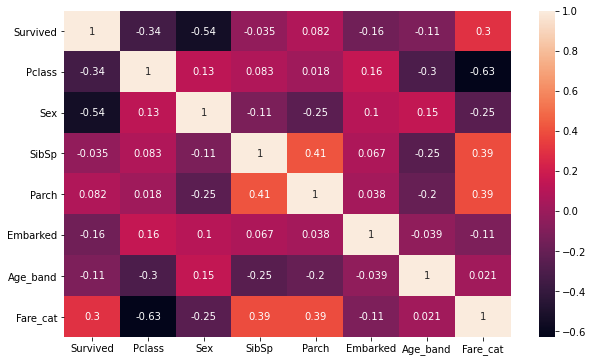

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

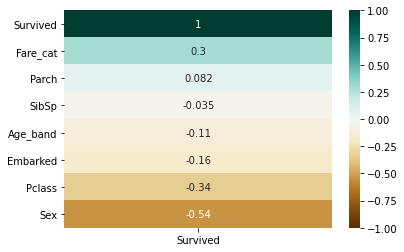

In [41]:
sns.heatmap(df.corr()[['Survived']].sort_values(by='Survived',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='BrBG') 

In [44]:
pd.crosstab(df.Parch,df.Pclass)


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Embarked  891 non-null    int32
 6   Age_band  891 non-null    int64
 7   Fare_cat  891 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 48.9 KB


In [66]:
col=df.columns
len(col)

8

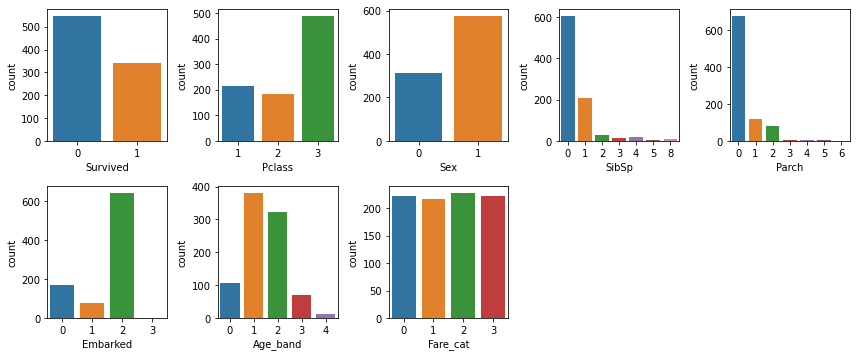

In [67]:
plt.figure(figsize=(12,12))
for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.countplot(x=col[i],data=df)
    plt.tight_layout()

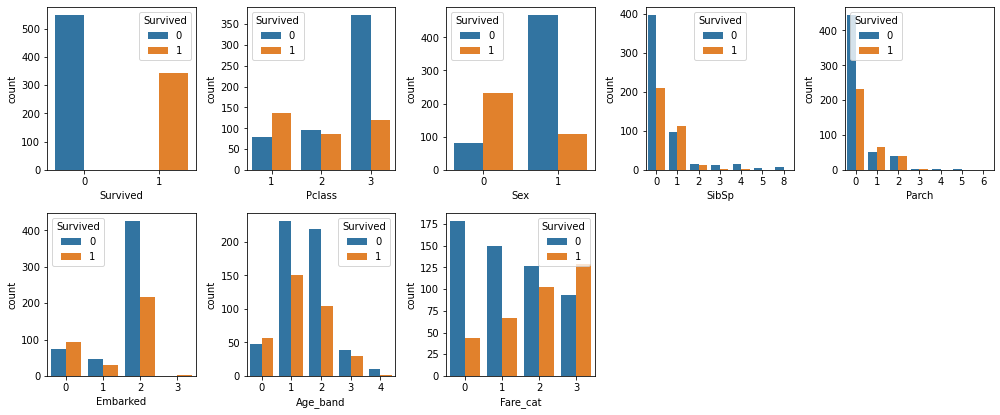

In [68]:

# countplot for each feature with repect to target variable
plt.figure(figsize=(14,14))
for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.countplot(x=col[i],hue='Survived',data=df)
    plt.tight_layout()


      OBSERVATION 
- PCLASS  - 3 MOSTLY UNABLE TO SURVIVE         
- SEX  - MOSTLY WOMENS ARE SURVIVED      
- FARE CAT -   RICH PEOPLE SURVIVED MOST 
- AGE - YOUNG PEOPLE SURVIVED MOST 

# Creating train_test_split

In [51]:
x=df.drop(['Survived'],axis=1)
y=df["Survived"]

In [117]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split #training and testing data split

from sklearn import metrics 
#accuracy measure
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report,mean_squared_error
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV


In [61]:
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [62]:
lr =LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred=lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print( accuracy_score(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

[[110  12]
 [ 35  66]]
0.7892376681614349
classification report 
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       122
           1       0.85      0.65      0.74       101

    accuracy                           0.79       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.79      0.78       223



In [76]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    lr=LogisticRegression()
    lr.fit(xtrain,ytrain)
    y_pred=lr.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.776536312849162
accuracy score  0.8033707865168539
accuracy score  0.7865168539325843
accuracy score  0.7640449438202247
accuracy score  0.8089887640449438
mean accuracy score 0.7878915322327538


In [77]:

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

accuracy score  0.7713004484304933
confusion matrix 
 [[111  11]
 [ 40  61]]
classification report 
               precision    recall  f1-score   support

           0       0.74      0.91      0.81       122
           1       0.85      0.60      0.71       101

    accuracy                           0.77       223
   macro avg       0.79      0.76      0.76       223
weighted avg       0.79      0.77      0.76       223



In [78]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    dt.fit(xtrain,ytrain)
    y_pred=dt.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.7653631284916201
confusion matrix
 [[91 19]
 [23 46]]
accuracy score  0.7808988764044944
confusion matrix
 [[90 20]
 [19 49]]
accuracy score  0.7808988764044944
confusion matrix
 [[98 12]
 [27 41]]
accuracy score  0.7808988764044944
confusion matrix
 [[99 11]
 [28 40]]
accuracy score  0.8258426966292135
confusion matrix
 [[98 11]
 [20 49]]
mean accuracy score 0.7867804908668634


In [79]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

accuracy score  0.7802690582959642
confusion matrix 
 [[106  16]
 [ 33  68]]
classification report 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       122
           1       0.81      0.67      0.74       101

    accuracy                           0.78       223
   macro avg       0.79      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [80]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rf.fit(xtrain,ytrain)
    y_pred=rf.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.7932960893854749
confusion matrix
 [[93 17]
 [20 49]]
accuracy score  0.7752808988764045
confusion matrix
 [[89 21]
 [19 49]]
accuracy score  0.8089887640449438
confusion matrix
 [[99 11]
 [23 45]]
accuracy score  0.7865168539325843
confusion matrix
 [[98 12]
 [26 42]]
accuracy score  0.8370786516853933
confusion matrix
 [[95 14]
 [15 54]]
mean accuracy score 0.8002322515849603


In [81]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

accuracy score  0.7713004484304933
confusion matrix 
 [[110  12]
 [ 39  62]]
classification report 
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       122
           1       0.84      0.61      0.71       101

    accuracy                           0.77       223
   macro avg       0.79      0.76      0.76       223
weighted avg       0.78      0.77      0.77       223



In [82]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rf.fit(xtrain,ytrain)
    y_pred=rf.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.7932960893854749
confusion matrix
 [[93 17]
 [20 49]]
accuracy score  0.7752808988764045
confusion matrix
 [[90 20]
 [20 48]]
accuracy score  0.8089887640449438
confusion matrix
 [[98 12]
 [22 46]]
accuracy score  0.797752808988764
confusion matrix
 [[98 12]
 [24 44]]
accuracy score  0.8258426966292135
confusion matrix
 [[96 13]
 [18 51]]
mean accuracy score 0.80023225158496


In [84]:
gb= GaussianNB()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

accuracy score  0.7713004484304933
confusion matrix 
 [[103  19]
 [ 32  69]]
classification report 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       122
           1       0.78      0.68      0.73       101

    accuracy                           0.77       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.77      0.77      0.77       223



In [85]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rf.fit(xtrain,ytrain)
    y_pred=rf.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.7877094972067039
confusion matrix
 [[93 17]
 [21 48]]
accuracy score  0.7808988764044944
confusion matrix
 [[90 20]
 [19 49]]
accuracy score  0.8089887640449438
confusion matrix
 [[99 11]
 [23 45]]
accuracy score  0.797752808988764
confusion matrix
 [[99 11]
 [25 43]]
accuracy score  0.8426966292134831
confusion matrix
 [[97 12]
 [16 53]]
mean accuracy score 0.8036093151716779


In [90]:
sc=SVC()
sc.fit(x_train,y_train)
y_pred=sc.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rf.fit(xtrain,ytrain)
    y_pred=rf.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.8026905829596412
confusion matrix 
 [[113   9]
 [ 35  66]]
classification report 
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       122
           1       0.88      0.65      0.75       101

    accuracy                           0.80       223
   macro avg       0.82      0.79      0.79       223
weighted avg       0.82      0.80      0.80       223

accuracy score  0.7932960893854749
confusion matrix
 [[93 17]
 [20 49]]
accuracy score  0.7808988764044944
confusion matrix
 [[90 20]
 [19 49]]
accuracy score  0.8258426966292135
confusion matrix
 [[97 13]
 [18 50]]
accuracy score  0.7865168539325843
confusion matrix
 [[97 13]
 [25 43]]
accuracy score  0.8258426966292135
confusion matrix
 [[96 13]
 [18 51]]
mean accuracy score 0.8024794425961961


# Tunning 

In [129]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'cv': None,
 'error_score': nan,
 'estimator': GridSearchCV(estimator=GaussianNB(),
             param_grid={'C': [1.0, 10.0, 20.0, 50.0, 100.0, 150.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}),
 'estimator__cv': None,
 'estimator__error_score': nan,
 'estimator__estimator': GaussianNB(),
 'estimator__estimator__priors': None,
 'estimator__estimator__var_smoothing': 1e-09,
 'estimator__n_jobs': None,
 'estimator__param_grid': {'C': [1.0, 10.0, 20.0, 50.0, 100.0, 150.0],
                           'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
 'estimator__pre_dispatch': '2*n_jobs',
 'estimator__refit': True,
 'estimator__return_train_score': False,
 'estimator__scoring': None,
 'estimator__verbose': 0,
 'n_jobs': None,
 'param_grid': {'C': [1.0, 10.0, 20.0, 50.0, 100.0, 150.0],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'sco

In [131]:
gb= grid_obj = GridSearchCV(gb, parameters)
grid_obj = grid_obj.fit(x_train, y_train)
params_NB = {'C': [1.0, 10.0, 20.0, 50.0, 100.0, 150.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
gs_NB = GridSearchCV(estimator=gb, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)
print('best score', gs_NB.best_score_)
gbbest=gs_NB.best_params_
print(gbbest)

ValueError: Invalid parameter C for estimator GridSearchCV(estimator=GridSearchCV(estimator=GridSearchCV(estimator=GaussianNB(),
                                                           param_grid={'C': [1.0,
                                                                             10.0,
                                                                             20.0,
                                                                             50.0,
                                                                             100.0,
                                                                             150.0],
                                                                       'kernel': ['linear',
                                                                                  'poly',
                                                                                  'rbf',
                                                                                  'sigmoid']}),
                                    param_grid={'C': [1.0, 10.0, 20.0, 50.0,
                                                      100.0, 150.0],
                                                'kernel': ['linear', 'poly',
                                                           'rbf', 'sigmoid']}),
             param_grid={'C': [1.0, 10.0, 20.0, 50.0, 100.0, 150.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}). Check the list of available parameters with `estimator.get_params().keys()`.

# Decision tree 

In [124]:
params={'criterion':['gini', 'entropy'],
        'max_depth':[3,4,5,6,7,8,9,10],
        'splitter':['best','random'],
        'min_samples_split':[2,4,6,10,12],
        'min_samples_leaf':[1,2,3,4],
        'max_features':['sqrt','log2',None],
        'random_state':[42,]}

dt_reg=GridSearchCV(estimator=dt,
                    param_grid=params,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1)

dt_reg.fit(x_train,y_train)
print('best score ',dt_reg.best_score_)
dtbest=dt_reg.best_estimator_
print(dtbest)

best score  0.8324739936680234
DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_leaf=3, random_state=42)


In [125]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    dtbest.fit(xtrain,ytrain)
    y_pred=dtbest.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.776536312849162
confusion matrix
 [[92 18]
 [22 47]]
accuracy score  0.7415730337078652
confusion matrix
 [[87 23]
 [23 45]]
accuracy score  0.8539325842696629
confusion matrix
 [[103   7]
 [ 19  49]]
accuracy score  0.797752808988764
confusion matrix
 [[99 11]
 [25 43]]
accuracy score  0.7921348314606742
confusion matrix
 [[95 14]
 [23 46]]
mean accuracy score 0.7923859142552256


In [133]:
para={'criterion':['gini','entropy'],
     'max_depth':[5,6,7,8],
     'min_samples_split':[2,4],
     'min_samples_leaf':[1,2],
      'random_state':[42,],
     'max_samples':[int(i) for i in np.linspace(0,890,5)]
     } 

rf_reg=GridSearchCV(estimator=rf,
                    param_grid=para,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1)

rf_reg.fit(x_train,y_train)
print('best score ',rf_reg.best_score_)
rfbest=rf_reg.best_estimator_
print(rfbest)

F:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.82345093 0.82044324
 0.82193578 0.82193578 0.82648123 0.82797377 0.82496608 0.82496608
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.82645862 0.82944369 0.81897332 0.81897332 0.82046585 0.82349616
 0.82347354 0.82347354        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.82494346 0.82648123 0.81897332 0.81897332
 0.82645862 0.8294663  0.83095884 0.83095884        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.8189507  0.82648123
 0.81601085 0.81601085 0.82645862 0.82799638 0.82948892 0.82948892
        nan        nan        nan        nan        nan        nan

best score  0.8309588421528721
RandomForestClassifier(max_depth=7, max_samples=445, min_samples_leaf=2,
                       random_state=42)


In [134]:
kfold=StratifiedKFold(n_splits=5) 
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rfbest.fit(xtrain,ytrain)
    y_pred=rfbest.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.7821229050279329
confusion matrix
 [[95 15]
 [24 45]]
accuracy score  0.8089887640449438
confusion matrix
 [[97 13]
 [21 47]]
accuracy score  0.8146067415730337
confusion matrix
 [[98 12]
 [21 47]]
accuracy score  0.7865168539325843
confusion matrix
 [[103   7]
 [ 31  37]]
accuracy score  0.8370786516853933
confusion matrix
 [[100   9]
 [ 20  49]]
mean accuracy score 0.8058627832527776


# Saving the model

In [135]:
import joblib 
joblib.dump(rf,'titanic.pkl')

['titanic.pkl']

# load the model

In [136]:

model=joblib.load('titanic.pkl')
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8385650224215246